In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
pd.set_option('display.max_columns', None)

In [31]:
df = pd.read_csv('C:/Users/SONY/Machine_Learning_Project/Processed_Data/gurgaon_properties_missing_value_imputation.csv')

In [32]:
df.shape

(3248, 20)

In [33]:
df.head()

,society,property_type,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,property_id,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,emaar palm gardens,flat,1.75,9211.0,3.0,3,3,6.0,Relatively New,V69525180,sector 83,1600.0,0,1,0,0,0,2,150,633.333333
1,eros wembley estate,flat,1.40,10174.0,3.0,3,2,9.0,Relatively New,K69325724,sector 50,1239.0,0,0,1,0,0,2,117,458.666667
2,ss the leaf,flat,2.13,7575.0,4.0,4,3,6.0,Relatively New,K70087544,sector 85,2600.0,0,0,0,0,0,0,49,703.000000
3,international city by sobha phase 2,house,6.25,10035.0,5.0,7,3+,3.0,Relatively New,NaN,sector 109,6228.0,1,1,1,1,0,0,147,1245.600000
4,ss the coralwood,flat,1.10,4857.0,3.0,3,2,9.0,Relatively New,H66415758,sector 84,1575.0,0,0,0,0,0,0,75,755.000000


In [34]:
df = df.drop(columns=['property_id'])

In [35]:
df.head()

,society,property_type,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,emaar palm gardens,flat,1.75,9211.0,3.0,3,3,6.0,Relatively New,sector 83,1600.0,0,1,0,0,0,2,150,633.333333
1,eros wembley estate,flat,1.40,10174.0,3.0,3,2,9.0,Relatively New,sector 50,1239.0,0,0,1,0,0,2,117,458.666667
2,ss the leaf,flat,2.13,7575.0,4.0,4,3,6.0,Relatively New,sector 85,2600.0,0,0,0,0,0,0,49,703.000000
3,international city by sobha phase 2,house,6.25,10035.0,5.0,7,3+,3.0,Relatively New,sector 109,6228.0,1,1,1,1,0,0,147,1245.600000
4,ss the coralwood,flat,1.10,4857.0,3.0,3,2,9.0,Relatively New,sector 84,1575.0,0,0,0,0,0,0,75,755.000000


In [36]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [37]:
train_df.head()

,property_type,price,bedRoom,bathroom,balcony,floorNum,agePossession,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,1.75,3.0,3,3,6.0,Relatively New,sector 83,1600.0,0,1,0,0,0,2,150,633.333333
1,flat,1.40,3.0,3,2,9.0,Relatively New,sector 50,1239.0,0,0,1,0,0,2,117,458.666667
2,flat,2.13,4.0,4,3,6.0,Relatively New,sector 85,2600.0,0,0,0,0,0,0,49,703.000000
3,house,6.25,5.0,7,3+,3.0,Relatively New,sector 109,6228.0,1,1,1,1,0,0,147,1245.600000
4,flat,1.10,3.0,3,2,9.0,Relatively New,sector 84,1575.0,0,0,0,0,0,0,75,755.000000


In [39]:
numeric_df = train_df.select_dtypes(include=['number'])

<Axes: >

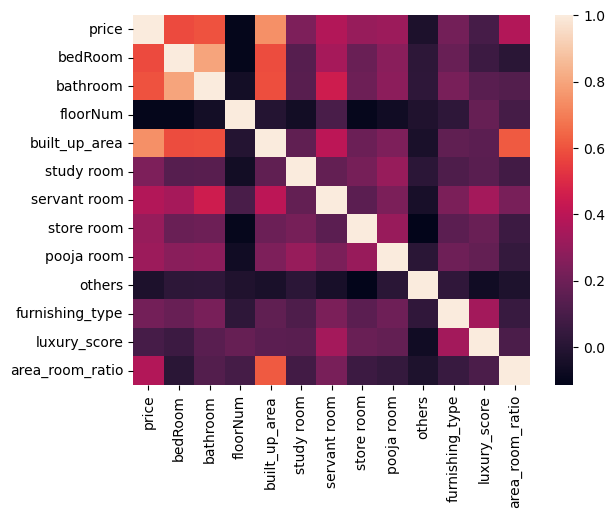

In [40]:
sns.heatmap(numeric_df.corr())

In [42]:
numeric_df.corr()['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.745111
bathroom           0.595397
bedRoom            0.578277
area_room_ratio    0.377428
servant room       0.373579
pooja room         0.318912
store room         0.306808
study room         0.242200
furnishing_type    0.216453
luxury_score       0.092053
others            -0.030196
floorNum          -0.105085
Name: price, dtype: float64

In [43]:
# cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession